In [29]:
import video.vid as v
import pandas as pd
from video import df
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt


In [30]:
reload(v)
path = 'videos/Banned Pokemon Seizure Scene.mp4'
vid = v.Video.from_file(path)
vid_df = df.get_vid_df(path)

## Testing that outputs are the same as `df`

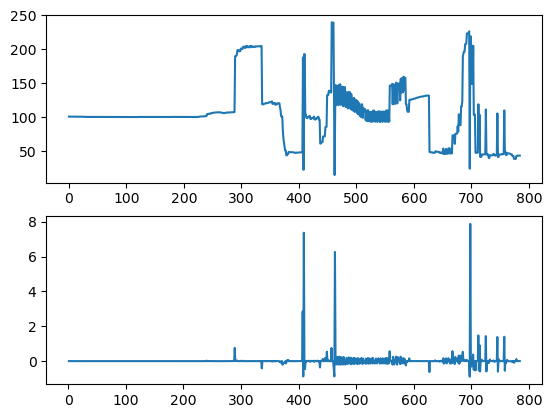

In [3]:
reload(v)
fig, axs = plt.subplots(2,1)
axs[0].plot(vid.lightness.agg('mean') )
axs[1].plot(vid_df.groupby(level=0).lightness.mean().pct_change(1))
plt.show()

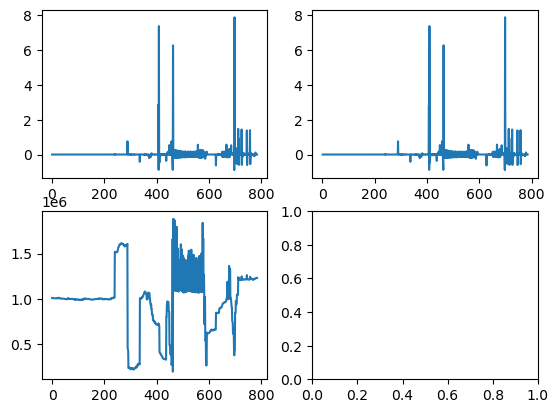

In [31]:
reload(v)

fig, axs = plt.subplots(2,2)
axs[0,0].plot(vid.pct_change(1,'lightness'))
axs[0][1].plot(vid.lightness.pct_change(1))
axs[1,0].plot(vid.hue.agg('sum'))

In [7]:
vid_df.head()

hue  lightness  saturation
frame y x                            
0     0 0    0         36           0
        1    0         34           0
        2    0         33           0
        3    0         32           0
        4    0         31           0

In [9]:
type(vid_df)

pandas.core.frame.DataFrame

In [13]:
df.add_mask(vid_df)

hue  lightness  saturation  masked_values
frame y  x                                             
0     0  0      0         36           0              0
         1      0         34           0              0
         2      0         33           0              0
         3      0         32           0              0
         4      0         31           0              0
...           ...        ...         ...            ...
784   89 115  114         34          70              0
         116  114         34          70              0
         117  114         34          70              0
         118  114         34          70              0
         119  114         34          70              0

[8478000 rows x 4 columns]

In [14]:
df.add_seconds(vid_df)

hue  lightness  saturation  seconds
frame y  x                                       
0     0  0      0         36           0        0
         1      0         34           0        0
         2      0         33           0        0
         3      0         32           0        0
         4      0         31           0        0
...           ...        ...         ...      ...
784   89 115  114         34          70       26
         116  114         34          70       26
         117  114         34          70       26
         118  114         34          70       26
         119  114         34          70       26

[8478000 rows x 4 columns]

In [15]:
cdf = df.get_exploration_df(path)

In [16]:
cdf.head()

hue  lightness  saturation  masked_values  seconds
frame y x                                                    
0     0 0    0         36           0              0        0
        1    0         34           0              0        0
        2    0         33           0              0        0
        3    0         32           0              0        0
        4    0         31           0              0        0

In [17]:
agg_df = df.get_aggregated_df(cdf)

In [18]:
agg_df.head()

,lightness,hue,saturation,masked_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,
0,101.233148,93.464907,92.000093,1766,NaN,NaN,NaN,NaN
1,101.229630,93.529074,92.102315,1766,0.003519,-0.064167,-0.102222,0.0
2,101.204352,93.523148,92.174352,1766,0.025278,0.005926,-0.072037,0.0
3,101.181667,93.366296,92.231852,1764,0.022685,0.156852,-0.057500,2.0
4,101.148426,93.322315,92.466296,1764,0.033241,0.043981,-0.234444,0.0


In [25]:
reload(v)

<module 'video.vid' from '/Users/nadina/Documents/codeup/epilator/video/vid.py'>

In [33]:
vid

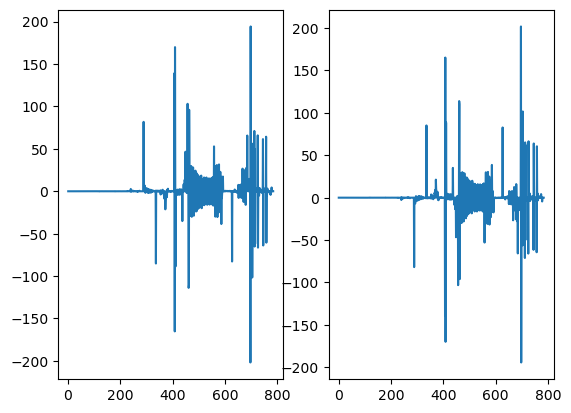

In [34]:
fig, axs = plt.subplots(1,2)
axs[0].plot(vid.difference(1,'lightness'))
axs[1].plot(agg_df.light_diff)

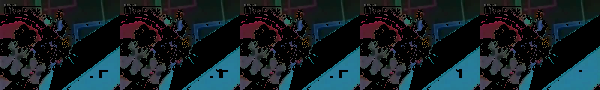

In [14]:
vid.mask(100)[:5].show()